In [68]:
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(precision=4, suppress=True)

(2, 500)

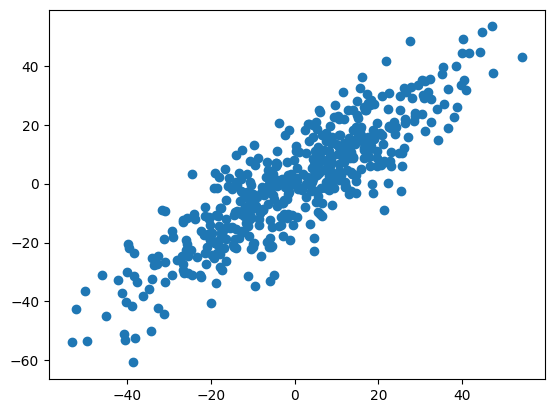

In [69]:
np.random.seed(0)

mean = [100, 150]  # center of data
cov = [[400, 350],
       [350, 400]]  # spread of data

X = np.random.multivariate_normal(mean, cov, size=500).T
X = X - X.mean(axis=1, keepdims=True)

X.shape
_ = plt.scatter(*X)

# Finding PCs using `C = XX'/n` approach

In [70]:
n = X.shape[1]
C = X @ X.T / n
C.shape

(2, 2)

In [71]:
eigenvalues, eigenvectors = np.linalg.eigh(C)
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

eigenvalues
eigenvectors

array([710.85  ,  49.9875])

array([[ 0.705 , -0.7092],
       [ 0.7092,  0.705 ]])

# Finding PCs using `K = X'X` approach

In [72]:
K = X.T @ X
K.shape

(500, 500)

In [73]:
n_lambdas, betas = np.linalg.eigh(K)
sorted_indices = np.argsort(n_lambdas)[::-1]
n_lambdas = n_lambdas[sorted_indices]
betas = betas[:, sorted_indices]

n_lambdas.shape
betas.shape

(500,)

(500, 500)

In [74]:
count_nonzero = min(X.shape)
n_lambdas = n_lambdas[:count_nonzero]
betas = betas[:, :count_nonzero]

n_lambdas.shape
betas.shape

(2,)

(500, 2)

In [75]:
alphas = betas / np.sqrt(n_lambdas).reshape(1, -1)
alphas.shape

(500, 2)

In [76]:
eigenvalues_ = n_lambdas / n
eigenvectors_ = X @ alphas

# using `C = XX'/n` approach
eigenvalues
eigenvectors

# using `K = X'X` approach
eigenvalues_
eigenvectors_

array([710.85  ,  49.9875])

array([[ 0.705 , -0.7092],
       [ 0.7092,  0.705 ]])

array([710.85  ,  49.9875])

array([[ 0.705 ,  0.7092],
       [ 0.7092, -0.705 ]])

# Rest is same for both approaches

In [77]:
np.cumsum(eigenvalues) / sum(eigenvalues)

array([0.9343, 1.    ])

In [78]:
k = 1
W = eigenvectors[:, :k]
W

array([[0.705 ],
       [0.7092]])

In [79]:
coefficients = X.T @ W
coefficients.shape

(500, 1)

In [80]:
X_ = (coefficients @ W.T).T
X_.shape

(2, 500)

In [81]:
np.sqrt(np.mean((X - X_)**2))  # rmse

np.float64(4.999374289343242)

### Plotting the reconstructed data

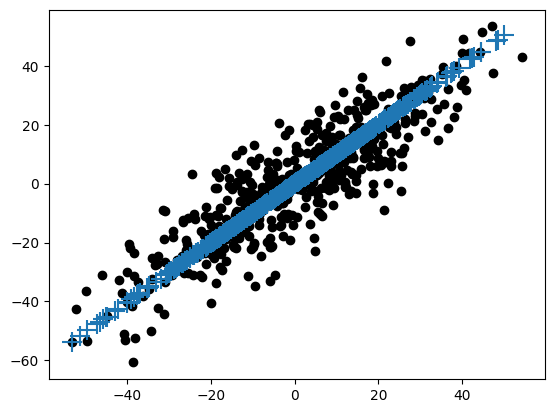

In [82]:
_ = plt.scatter(*X, color='k')
_ = plt.scatter(*X_, marker="+", s=200)

### Plotting only coefficients

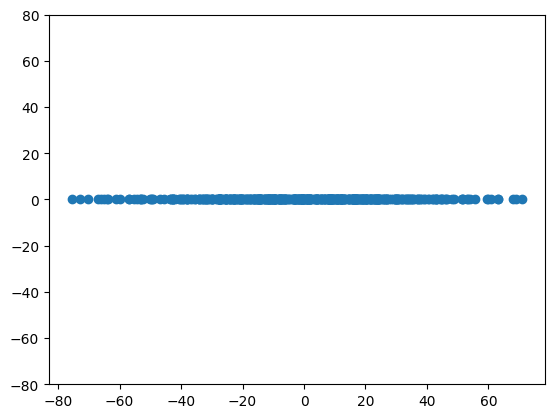

In [83]:
if k == 1:
  _ = plt.scatter(coefficients.T[0], [0]*n)

if k == 2:
  _ = plt.scatter(*coefficients.T)

_ = plt.ylim((-80, 80))

# Non linear relationships